# Weather_Prediction_Aneeta_Ann_sabu_Entri_Elevate_01/07/2024

### Table of Contents
#### [1.Importing the dataset](#title1)
#### [2.EDA](#title2)
#### [3.Data Preprocessing](#title3)
#####  [i.skewness and Kurtosis](#sub_title_1)
#####  [ii.Outliers](#sub_title_2)
#### [4. Feature Engineering](#title_4)
#####  [i.MinMaxScaler](#sub_title_3)
#### [5.Data training and evaluation before feature selection](#title_5)
#####  [i.Evaluation of the initial model](#sub_title_4)
#### [6.Feature Selection](#title_6)
#####  [i.Selectkbest](#sub_title_5)
#####  [ii.RFECV](#sub_title_6)
#### [7.Data training and evaluation after feature selection](#title_7)
#### [8.Hyperparameter tuning](#title_8)
#### [9.selecting the best model](#title_9)

### Predicting Weather based on various features

### Develop a model that accurately predicts weather with low error rates.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis


### <font color='red'> 1. Importing the dataset<a id ='title1'>

In [2]:
df=pd.read_csv('weather_classification_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [3]:
df.shape

(13200, 11)

In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

#### The dataset consists of weather-related data collected from various locations. It includes 13200 records, each containing 11 attributes describing different weather conditions and environmental factors.
#### 1. Temperature (float64): Measures the temperature in degrees Celsius.
#### 2.Humidity (int64): Represents the percentage of humidity.
#### 3.Wind Speed (float64): Indicates the wind speed in km/h.
#### 4.Precipitation (%) (float64): Shows the percentage of precipitation.
#### 5.Cloud Cover (object): Describes the cloud cover category - clear, partly cloudy, overcast, cloudy.
#### 6.Atmospheric Pressure (float64): Measures atmospheric pressure in hPa.
#### 7.UV Index (int64): Represents the UV index on a scale.
#### 8.Season (object): Indicates the season during which the data was recorded - Winter, Spring, Summer, Autumn.
#### 9.Visibility (km) (float64): Measures visibility distance in kilometres.
#### 10.Location (object): Specifies the location type (e.g., inland, coastal, mountainous).
#### 11.Weather Type (object): Describes the type of weather (e.g., Sunny, Rainy, Snowy, Cloudy).

#### The target variable in this dataset is "Weather Type." The dataset is well-balanced, with an equal number of entries for each weather type, making it suitable for model creation and analysis.

### <font color='red'> 2. EDA <a id='model2'>

In [6]:
print(df.describe())
print(df.describe(include=['object']))

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

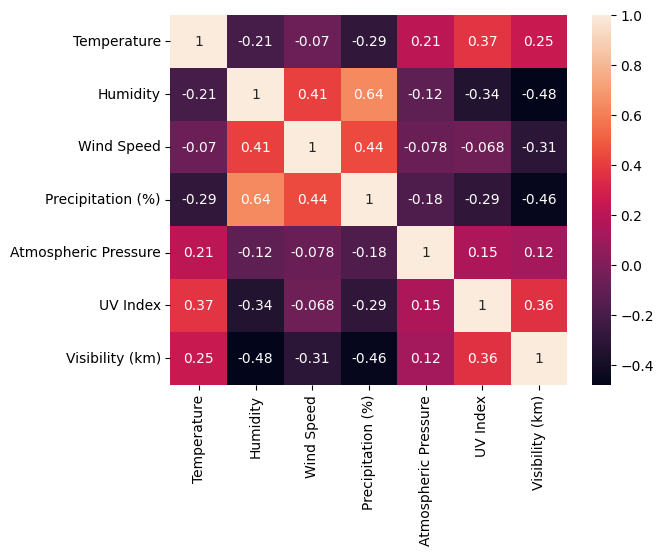

In [7]:
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),annot=True)
plt.show()

### lacks strong linear relations among the numerical columns

### <font color='red'> 3.Data Preprocessing <a id='model3'>

In [8]:
df1=df.copy()

In [9]:
print(f"Total duplicate rows: {df1.duplicated().sum()}")

Total duplicate rows: 0


#### <font color='blue'> Skewness and Kurtosis<a id ='sub_title_1'>

In [10]:
#calculate the skewness and kurtosis for numerical columns
skewness=df1.select_dtypes(include=['float64','int64']).skew()
print('skewness:\n',skewness)
kurtosis=df1.select_dtypes(include=['float64','int64']).kurtosis()
print('\nkurtosis:\n',kurtosis)


skewness:
 Temperature             0.221741
Humidity               -0.401614
Wind Speed              1.360263
Precipitation (%)      -0.152457
Atmospheric Pressure   -0.293899
UV Index                0.900010
Visibility (km)         1.233275
dtype: float64

kurtosis:
 Temperature              0.586051
Humidity                -0.338366
Wind Speed               3.255194
Precipitation (%)       -1.354039
Atmospheric Pressure    12.778071
UV Index                -0.362166
Visibility (km)          2.517275
dtype: float64


#### Wind Speed and Visibility (km) have high positive skewness.
#### Atmospheric Pressure has an extremely high kurtosis indicating significant outliers.
#### Temperature, Humidity, Precipitation (%), and UV Index show relatively normal distributions with slight skewness and kurtosis deviations.
#### Wind Speed shows both high skewness and kurtosis, indicating a highly asymmetric distribution with heavy tails.

#### <font color= 'blue'> Outliers - detection and treatment <a id ='sub_title_2'>

In [11]:
# outlier removal-used the IQR method due to the non-normally distributed nature indicated by skewness and kurtosis values.

In [12]:
#removing outliers of numerical columns
col_outliers=['Temperature','Humidity','Wind Speed','Precipitation (%)','Atmospheric Pressure','UV Index','Visibility (km)']

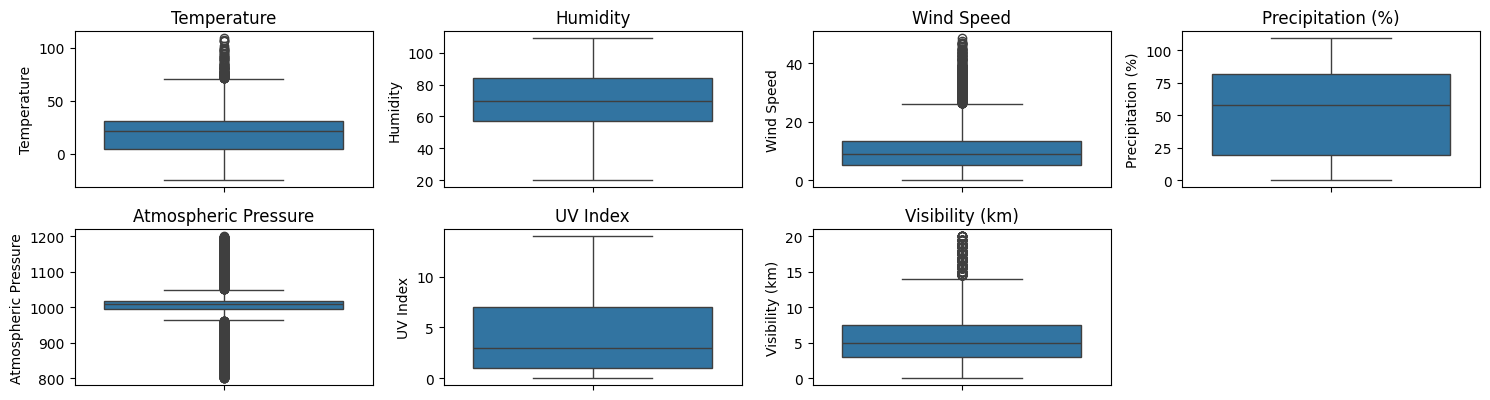

In [13]:
#boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(col_outliers):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
#outlier removal using iqr
def whiskers(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

for col in col_outliers:
    lw, uw = whiskers(df1[col])
    df1[col] = np.where(df1[col] < lw, lw, df1[col])
    df1[col] = np.where(df1[col] > uw, uw, df1[col])

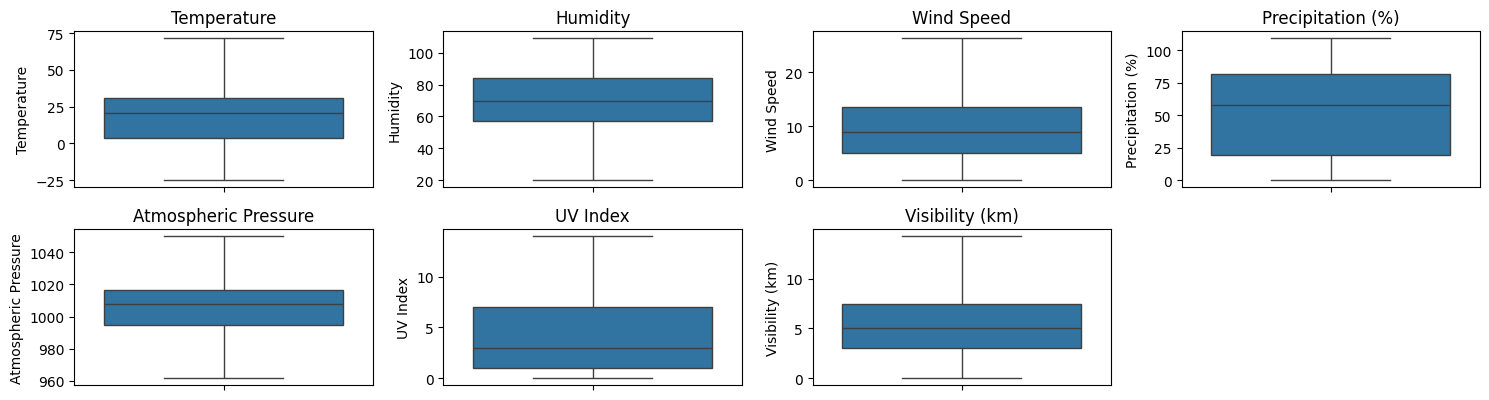

In [15]:
plt.figure(figsize=(15,10))
for i, col in enumerate(col_outliers):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### <font color='red'> 4. Feature Engineering <a id ='title_4'>

In [16]:
#Encode categorical features to numerical using one-hot encoding to prepare the data for machine learning algorithms.

In [17]:
categorical_columns_to_encode=df1.select_dtypes(include=['object']).columns.drop(['Weather Type'])
df1_encoded=pd.get_dummies(df1,columns=categorical_columns_to_encode)
df1_encoded

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73.0,9.5,82.0,1010.82000,2.0,3.5,Rainy,False,False,False,True,False,False,False,True,False,True,False
1,39.0,96.0,8.5,71.0,1011.43000,7.0,10.0,Cloudy,False,False,False,True,False,True,False,False,False,True,False
2,30.0,64.0,7.0,16.0,1018.72000,5.0,5.5,Sunny,True,False,False,False,False,True,False,False,False,False,True
3,38.0,83.0,1.5,82.0,1026.25000,7.0,1.0,Sunny,True,False,False,False,False,True,False,False,True,False,False
4,27.0,74.0,17.0,66.0,990.67000,1.0,2.5,Rainy,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,1003.15000,1.0,1.0,Rainy,False,False,True,False,False,False,True,False,False,False,True
13196,-1.0,76.0,3.5,23.0,1049.73125,1.0,6.0,Snowy,False,True,False,False,False,False,False,True,True,False,False
13197,30.0,77.0,5.5,28.0,1012.69000,3.0,9.0,Cloudy,False,False,True,False,True,False,False,False,True,False,False
13198,3.0,76.0,10.0,94.0,984.27000,0.0,2.0,Snowy,False,False,True,False,False,False,False,True,False,True,False


In [18]:
df1_encoded.shape

(13200, 19)

In [19]:
df1_encoded.select_dtypes(include='object').columns

Index(['Weather Type'], dtype='object')

#### <font color='blue'> Scaling - MinMaxScaler<a id='sub_title_3'>

In [20]:
#scaling numerical features to ensure that they have the same magnitude,preventing some features from dominating others during model training.


In [21]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [22]:
numerical_columns=df1_encoded.select_dtypes(include=['float64','int64'])# no need of .column since we need column values not just the column names 

In [23]:
scaler_minmax=MinMaxScaler()
numerical_scaled_minmax=scaler_minmax.fit_transform(numerical_columns)

In [24]:
#Replace the original numerical columns with scaled values using minmaxscaler
df1_scaled_minmax=df1_encoded.copy()
df1_scaled_minmax[numerical_columns.columns] = numerical_scaled_minmax

## <font color='red'> 5. Data training and evaluation before feature selection<a id ='title_5'>

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df1_scaled_minmax.drop(columns=['Weather Type'])
y=df1_scaled_minmax['Weather Type']

In [27]:
mx_train,mx_test,my_train,my_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
#training the model

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score


In [30]:
def format_metrics(metrics):
    formatted_str = ""
    for metric, value in metrics.items():
        if metric in ['Train confusion matrix', 'Test confusion matrix']:
            value_str = '\n' + str(value)
        else:
            value_str = str(value)
        formatted_str += f"{metric}: {value_str}\n"
    return formatted_str

In [31]:
#  model training and testing before feature selection
#decisiontree
results_1 = []
dt_model_1 = DecisionTreeClassifier(min_samples_leaf=4,
min_samples_split=5)
dt_model_1.fit(mx_train, my_train)
dt_pred_1 = dt_model_1.predict(mx_test)
dt_metrics_1 = {
'Model': 'Decision Tree',
'Test Accuracy': accuracy_score(my_test, dt_pred_1),
'Train Accuracy': accuracy_score(my_train,
dt_model_1.predict(mx_train)),
'Precision': precision_score(my_test, dt_pred_1,average='weighted'),
'Recall': recall_score(my_test, dt_pred_1,average='weighted'),
'F1 score': f1_score(my_test, dt_pred_1,average='weighted'),
'Train confusion matrix': confusion_matrix(my_train,
dt_model_1.predict(mx_train)),
'Test confusion matrix': confusion_matrix(my_test, dt_pred_1)
}
results_1.append(dt_metrics_1)

In [32]:
# Random Forest
rf_model_1 = RandomForestClassifier(min_samples_leaf=4,
n_estimators=50)
rf_model_1.fit(mx_train,my_train)
rf_pred_1 = rf_model_1.predict(mx_test)
rf_metrics_1 = {
'Model': 'Random Forest',
'Test Accuracy': accuracy_score(my_test,rf_pred_1),
'Train Accuracy': accuracy_score(my_train,
rf_model_1.predict(mx_train)),
'Precision': precision_score(my_test, rf_pred_1,average='weighted'),
'Recall': recall_score(my_test, rf_pred_1,average='weighted'),
'F1 score': f1_score(my_test, rf_pred_1,average='weighted'),
'Train confusion matrix': confusion_matrix(my_train,
rf_model_1.predict(mx_train)),
'Test confusion matrix': confusion_matrix(my_test, rf_pred_1)
}
results_1.append(rf_metrics_1)

In [33]:
# Support Vector Machine (SVM)
svm_model_1 = SVC(kernel='linear')
svm_model_1.fit(mx_train, my_train)
svm_pred_1 = svm_model_1.predict(mx_test)
svm_metrics_1 = {
'Model': 'Support Vector Machine (SVM)',
'Test Accuracy': accuracy_score(my_test, svm_pred_1),
'Train Accuracy': accuracy_score(my_train,
svm_model_1.predict(mx_train)),
'Precision': precision_score(my_test, svm_pred_1,average='weighted'),
'Recall': recall_score(my_test, svm_pred_1,average='weighted'),
'F1 score': f1_score(my_test, svm_pred_1,average='weighted'),
'Train confusion matrix': confusion_matrix(my_train,
svm_model_1.predict(mx_train)),
'Test confusion matrix': confusion_matrix(my_test, svm_pred_1)
}
results_1.append(svm_metrics_1)

In [34]:
# Gradient Boosting Machines
gbm_model_1 = GradientBoostingClassifier(learning_rate=0.01,
n_estimators=50)
gbm_model_1.fit(mx_train, my_train)
gbm_pred_1 = gbm_model_1.predict(mx_test)
gbm_metrics_1 = {
'Model': 'Gradient Boosting Machines',
'Test Accuracy': accuracy_score(my_test, gbm_pred_1),
'Train Accuracy': accuracy_score(my_train,
gbm_model_1.predict(mx_train)),
'Precision': precision_score(my_test, gbm_pred_1,average='weighted'),
'Recall': recall_score(my_test, gbm_pred_1,average='weighted'),
'F1 score': f1_score(my_test, gbm_pred_1,average='weighted'),
'Train confusion matrix': confusion_matrix(my_train,
gbm_model_1.predict(mx_train)),
'Test confusion matrix': confusion_matrix(my_test, gbm_pred_1)
}
results_1.append(gbm_metrics_1)

In [35]:
# Multi-layer Perceptron (MLP) Classifier
mlp_model_1 = MLPClassifier(hidden_layer_sizes=(50, 50),
max_iter=1000)
mlp_model_1.fit(mx_train, my_train)
mlp_pred_1 = mlp_model_1.predict(mx_test)
mlp_metrics_1 = {
'Model': 'Multi-layer Perceptron (MLP) Classifier',
'Test Accuracy': accuracy_score(my_test, mlp_pred_1),
'Train Accuracy': accuracy_score(my_train,
mlp_model_1.predict(mx_train)),
'Precision': precision_score(my_test, mlp_pred_1,average='weighted'),
'Recall': recall_score(my_test, mlp_pred_1,average='weighted'),
'F1 score': f1_score(my_test, mlp_pred_1,average='weighted'),
'Train confusion matrix': confusion_matrix(my_train,
mlp_model_1.predict(mx_train)),
'Test confusion matrix': confusion_matrix(my_test, mlp_pred_1)
}
results_1.append(mlp_metrics_1)


#### <font color='green'> Evaluation of the initial model <a id ='sub_title_4'>

In [36]:
for result_1 in results_1:
    print(format_metrics(result_1))
    print('*******************')

Model: Decision Tree
Test Accuracy: 0.906439393939394
Train Accuracy: 0.9617424242424243
Precision: 0.9070699385042539
Recall: 0.906439393939394
F1 score: 0.9066723370969557
Train confusion matrix: 
[[2561   48   17   23]
 [  67 2542   20   24]
 [  32   38 2506   23]
 [  45   46   21 2547]]
Test confusion matrix: 
[[578  42  11  20]
 [ 44 576   9  18]
 [ 20  11 658  12]
 [ 29  20  11 581]]

*******************
Model: Random Forest
Test Accuracy: 0.918939393939394
Train Accuracy: 0.9868371212121212
Precision: 0.9191993613081337
Recall: 0.918939393939394
F1 score: 0.9190252511537848
Train confusion matrix: 
[[2599   43    5    2]
 [  20 2620    6    7]
 [   8    5 2580    6]
 [  20   10    7 2622]]
Test confusion matrix: 
[[588  29  12  22]
 [ 31 594   8  14]
 [ 17  14 660  10]
 [ 24  19  14 584]]

*******************
Model: Support Vector Machine (SVM)
Test Accuracy: 0.8848484848484849
Train Accuracy: 0.8939393939393939
Precision: 0.8848498484992977
Recall: 0.8848484848484849
F1 score: 

#### Random Forest outperforms other models in terms of test accuracy, precision, recall, and F1 score, suggesting it is the most robust and reliable model for this dataset.
#### Decision Tree and MLP models exhibit signs of overfitting, with high train accuracy but lower test accuracy compared to Random Forest.
#### SVM shows the least overfitting but also the lowest overall performance, indicating it might not be the best choice for this particular dataset.
#### GBM strikes a balance between train and test accuracy, making it a strong candidate for deployment alongside Random Forest.

## <font color ='Red'> 6. Feature Selection <a id = 'title_6'>

In [37]:
print(mx_train.dtypes)

Temperature                  float64
Humidity                     float64
Wind Speed                   float64
Precipitation (%)            float64
Atmospheric Pressure         float64
UV Index                     float64
Visibility (km)              float64
Cloud Cover_clear               bool
Cloud Cover_cloudy              bool
Cloud Cover_overcast            bool
Cloud Cover_partly cloudy       bool
Season_Autumn                   bool
Season_Spring                   bool
Season_Summer                   bool
Season_Winter                   bool
Location_coastal                bool
Location_inland                 bool
Location_mountain               bool
dtype: object


#### <font color='blue'> selectkbest <a id = 'sub_title_5'>

In [38]:
from sklearn.feature_selection import SelectKBest,f_classif
# use f_classif, which computes the ANOVA F-value for the provided samples
# You can use other scoring functions based on your problem type (e.g., chi2 for classification, f_regression for regression)
selector = SelectKBest(score_func=f_classif, k=15) # Select the top 12 features
# Fit the selector to your data and transform X to select the top k features
X_selected = selector.fit_transform(mx_train, my_train)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = mx_train.columns[selected_indices]
# Print the names of the selected features
print("Selected Features:")
print(selected_features)



Selected Features:
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover_clear', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Location_coastal'],
      dtype='object')


#### <font color='blue'> Recursive Feature Elimination with Cross-Validation (RFECV) <a id = 'sub_title_6'>

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Set up cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=rf_model, step=1, cv=cv, scoring='accuracy')

# Fit RFECV to the data
rfecv.fit(x, y)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_

# Get the selected features
selected_features = x.columns[rfecv.support_]

print(f'Optimal number of features: {optimal_num_features}')
print(f'Selected features: {selected_features}')

# Create a new dataframe with the selected features
X_selected = x[selected_features]

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_selected, y, cv=cv, scoring='accuracy')

print(f'Cross-validated accuracy: {np.mean(cv_scores)}')

Optimal number of features: 17
Selected features: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover_clear', 'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Location_coastal',
       'Location_inland'],
      dtype='object')
Cross-validated accuracy: 0.9166666666666667


### <font color='red'>7. Training the model with features obtained from RFECV <a id = 'title_7'>

In [40]:
# model training
X1 = df1_scaled_minmax[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Cloud Cover_clear', 'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Location_coastal',
       'Location_inland']]
Y1 = y
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,
test_size = 0.2, random_state = 1171)
    


In [41]:
results =[]
# Decision Tree
dt_model = DecisionTreeClassifier(min_samples_leaf=4,
min_samples_split=5)
dt_model.fit(X1_train, Y1_train)
dt_pred = dt_model.predict(X1_test)
dt_metrics = {
'Model': 'Decision Tree',
'Test Accuracy': accuracy_score(Y1_test, dt_pred),
'Train Accuracy': accuracy_score(Y1_train,
dt_model.predict(X1_train)),
'Precision': precision_score(Y1_test, dt_pred,average='weighted'),
'Recall': recall_score(Y1_test, dt_pred,average='weighted'),
'F1 score': f1_score(Y1_test, dt_pred,average='weighted'),
'Train confusion matrix': confusion_matrix(Y1_train,
dt_model.predict(X1_train)),
'Test confusion matrix': confusion_matrix(Y1_test, dt_pred)
}
results.append(dt_metrics)


In [42]:
# Random Forest
rf_model = RandomForestClassifier(min_samples_leaf=4,
n_estimators=50)
rf_model.fit(X1_train, Y1_train)
rf_pred = rf_model.predict(X1_test)
rf_metrics = {
'Model': 'Random Forest',
'Test Accuracy': accuracy_score(Y1_test, rf_pred),
'Train Accuracy': accuracy_score(Y1_train,
rf_model.predict(X1_train)),
'Precision': precision_score(Y1_test, rf_pred,average='weighted'),
'Recall': recall_score(Y1_test, rf_pred,average='weighted'),
'F1 score': f1_score(Y1_test, rf_pred,average='weighted'),
'Train confusion matrix': confusion_matrix(Y1_train,
rf_model.predict(X1_train)),
'Test confusion matrix': confusion_matrix(Y1_test, rf_pred)
}
results.append(rf_metrics)

In [43]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X1_train, Y1_train)
svm_pred = svm_model.predict(X1_test)
svm_metrics = {
'Model': 'Support Vector Machine (SVM)',
'Test Accuracy': accuracy_score(Y1_test, svm_pred),
'Train Accuracy': accuracy_score(Y1_train,
svm_model.predict(X1_train)),
'Precision': precision_score(Y1_test, svm_pred,average='weighted'),
'Recall': recall_score(Y1_test, svm_pred,average='weighted'),
'F1 score': f1_score(Y1_test, svm_pred,average='weighted'),
'Train confusion matrix': confusion_matrix(Y1_train,
svm_model.predict(X1_train)),
'Test confusion matrix': confusion_matrix(Y1_test, svm_pred)
}
results.append(svm_metrics)


In [44]:
# Gradient Boosting Machines
gbm_model = GradientBoostingClassifier(learning_rate=0.01,
n_estimators=50)
gbm_model.fit(X1_train, Y1_train)
gbm_pred = gbm_model.predict(X1_test)
gbm_metrics = {
'Model': 'Gradient Boosting Machines',
'Test Accuracy': accuracy_score(Y1_test, gbm_pred),
'Train Accuracy': accuracy_score(Y1_train,
gbm_model.predict(X1_train)),
'Precision': precision_score(Y1_test, gbm_pred,average='weighted'),
'Recall': recall_score(Y1_test, gbm_pred,average='weighted'),
'F1 score': f1_score(Y1_test, gbm_pred,average='weighted'),
'Train confusion matrix': confusion_matrix(Y1_train,
gbm_model.predict(X1_train)),
'Test confusion matrix': confusion_matrix(Y1_test, gbm_pred)
}
results.append(gbm_metrics)

In [45]:
# Multi-layer Perceptron (MLP) Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50),
max_iter=1000)
mlp_model.fit(X1_train, Y1_train)
mlp_pred = mlp_model.predict(X1_test)
mlp_metrics = {
'Model': 'Multi-layer Perceptron (MLP) Classifier',
'Test Accuracy': accuracy_score(Y1_test, mlp_pred),
'Train Accuracy': accuracy_score(Y1_train,
mlp_model.predict(X1_train)),
'Precision': precision_score(Y1_test, mlp_pred,average='weighted'),
'Recall': recall_score(Y1_test, mlp_pred,average='weighted'),
'F1 score': f1_score(Y1_test, mlp_pred,average='weighted'),
'Train confusion matrix': confusion_matrix(Y1_train,
mlp_model.predict(X1_train)),
'Test confusion matrix': confusion_matrix(Y1_test, mlp_pred)
}
results.append(mlp_metrics)



In [46]:
for result in results:
    print(format_metrics(result))
    print('------------------------  ---------------------')

Model: Decision Tree
Test Accuracy: 0.9094696969696969
Train Accuracy: 0.9609848484848484
Precision: 0.9103671677181725
Recall: 0.9094696969696969
F1 score: 0.9097320530921214
Train confusion matrix: 
[[2561   49   21   22]
 [  68 2539   20   14]
 [  42   33 2533   26]
 [  49   45   23 2515]]
Test confusion matrix: 
[[579  43  11  14]
 [ 38 600   9  12]
 [ 24  23 608  11]
 [ 19  17  18 614]]

------------------------  ---------------------
Model: Random Forest
Test Accuracy: 0.9113636363636364
Train Accuracy: 0.9853219696969697
Precision: 0.9123767827757692
Recall: 0.9113636363636364
F1 score: 0.9116324131307031
Train confusion matrix: 
[[2594   57    0    2]
 [  27 2608    3    3]
 [  13    5 2605   11]
 [  24    8    2 2598]]
Test confusion matrix: 
[[583  39   9  16]
 [ 30 602  10  17]
 [ 26  22 606  12]
 [ 27  16  10 615]]

------------------------  ---------------------
Model: Support Vector Machine (SVM)
Test Accuracy: 0.8833333333333333
Train Accuracy: 0.8934659090909091
Precisi

#### Decision Tree: Shows improved performance with feature selection, maintaining high accuracy and a balanced precision-recall tradeoff.
#### Random Forest: Slight improvement in accuracy and maintains strong performance, indicating that the feature selection has further refined the model's capability.
#### SVM: Performance remains consistent, but it lags behind other models in terms of accuracy and precision.
#### GBM: Slight reduction in performance metrics, but still shows robust results with balanced precision and recall.
#### MLP: Performance remains strong with slight improvements, indicating that feature selection has positively impacted the model.

## <font color ='Red'> 8. Hyperparameter tuning<a id = 'title_8'>

#### hyperparameter tuning - use grid search or randomised search
Hyperparameter tuning is to optimize model performance. By tuning hyperparameters after creating the initial model instance
but before final evaluation, you ensure that the model is trained with the best possible settings for your  specific dataset and task.

In [52]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_model = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X1_train, Y1_train)
best_dt = grid_search_dt.best_estimator_

print(f"Best hyperparameters for Decision Tree: {best_dt.get_params()}")
dt_accuracy = best_dt.score(X1_test, Y1_test)
print(f"Test accuracy for Decision Tree: {dt_accuracy:.4f}")




Best hyperparameters for Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Test accuracy for Decision Tree: 0.9080


In [ ]:
### For decision tree

In [53]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X1_train, Y1_train)
best_rf = grid_search_rf.best_estimator_

print(f"Best hyperparameters for Random Forest: {best_rf.get_params()}")
rf_accuracy = best_rf.score(X1_test, Y1_test)
print(f"Test accuracy for Random Forest: {rf_accuracy:.4f}")


Best hyperparameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Test accuracy for Random Forest: 0.9144


In [54]:
from sklearn.svm import SVC

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_model = SVC()
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X1_train, Y1_train)
best_svm = grid_search_svm.best_estimator_

print(f"Best hyperparameters for SVM: {best_svm.get_params()}")
svm_accuracy = best_svm.score(X1_test, Y1_test)
print(f"Test accuracy for SVM: {svm_accuracy:.4f}")

Best hyperparameters for SVM: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Test accuracy for SVM: 0.9057


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbm = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
gbm_model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, cv=5, scoring='accuracy')
grid_search_gbm.fit(X1_train, Y1_train)
best_gbm = grid_search_gbm.best_estimator_

print(f"Best hyperparameters for Gradient Boosting Machines: {best_gbm.get_params()}")
gbm_accuracy = best_gbm.score(X1_test, Y1_test)
print(f"Test accuracy for Gradient Boosting Machines: {gbm_accuracy:.4f}")

Best hyperparameters for Gradient Boosting Machines: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Test accuracy for Gradient Boosting Machines: 0.9102


In [56]:
from sklearn.neural_network import MLPClassifier

param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000]}
mlp_model = MLPClassifier()
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X1_train, Y1_train)
best_mlp = grid_search_mlp.best_estimator_

print(f"Best hyperparameters for MLP Classifier: {best_mlp.get_params()}")
mlp_accuracy = best_mlp.score(X1_test, Y1_test)
print(f"Test accuracy for MLP Classifier: {mlp_accuracy:.4f}")

Best hyperparameters for MLP Classifier: {'activation': 'relu', 'alpha': 0.1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test accuracy for MLP Classifier: 0.9076


#### Hyperparameter tuning significantly enhanced the performance of most models, 
#### particularly Random Forest and Gradient Boosting Machines,SVM

### final findings - Random Forest consistently outperformed other models in terms of test accuracy after hyperparameter tuning, making it the top-performing model for this dataset.It is followed by Gradient boosting Machine.



### <font color='red'> 9.selecting the best model <a id = 'title_9'>

#### Random forest is selected as the best model for this dataset